In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)

In [2]:
df_geo = pd.read_csv('geo_data.txt', sep='\t', header=None, names=['lat', 'lon'])/10000

In [3]:
df_geo.head()

,lat,lon
0,62.5983,29.7439
1,62.6146,29.7440
2,62.6144,29.7456
3,62.6004,29.7394
4,62.6018,29.7437


In [11]:
km_in_radian = 6371.0088

In [12]:
from sklearn.neighbors import NearestNeighbors

In [13]:
# Convert degrees to radians
X = df_geo.values
X = np.radians(X)
X[:10]

array([[1.09254644, 0.51912899],
       [1.09283093, 0.51913073],
       [1.09282744, 0.51915866],
       [1.09258309, 0.51905045],
       [1.09260753, 0.5191255 ],
       [1.09264243, 0.51926687],
       [1.09261451, 0.51913073],
       [1.09262324, 0.51918658],
       [1.09261276, 0.51913073],
       [1.09269828, 0.51920927]])

In [15]:
model = NearestNeighbors(n_neighbors=20, algorithm='ball_tree', metric='haversine')
model.fit(X)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='haversine',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [17]:
# Distance calculation
dist, _ = model.kneighbors(X, n_neighbors=20, return_distance=True)
dist.shape

(13467, 20)

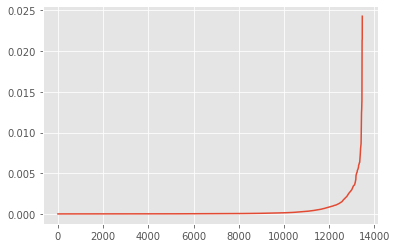

In [18]:
dist = dist[:, -1]
dist = np.sort(dist)
plt.plot(dist)

In [19]:
# We set epsilon which corresponds hiqh growing graph place
eps = 0.002

In [20]:
from sklearn.cluster import DBSCAN

In [22]:
dbscan = DBSCAN(eps=eps, min_samples=20, metric='haversine', algorithm='ball_tree')
dbscan.fit(X)

DBSCAN(algorithm='ball_tree', eps=0.002, leaf_size=30, metric='haversine',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [23]:
labels = dbscan.labels_

In [24]:
pd.Series(labels).value_counts()

 0     10666
-1       536
 3       329
 10      290
 1       249
 2       162
 5       146
 9       137
 13       93
 16       68
 18       67
 7        59
 22       50
 27       48
 11       44
 6        43
 26       39
 21       37
 17       36
 12       34
 8        33
 14       33
 23       31
 30       28
 25       27
 19       26
 24       25
 29       24
 15       24
 31       22
 4        21
 20       20
 28       20
dtype: int64